## Data Understanding

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper as t
pd.options.mode.chained_assignment = None  # default='warn'

from IPython import display
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
sns.set(style='darkgrid')

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',154)

df = pd.read_csv('./listings.csv')

In [131]:
#df.columns

#### https://www.kaggle.com/airbnb/seattle

In [132]:
# Create new dataframe with columns of interest for the analysis
df1 = df[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'property_type', 'room_type','host_response_time',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities','guests_included','cancellation_policy',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','reviews_per_month',
       'review_scores_value', 'instant_bookable','price']]

In [133]:
def convert_to_float(input_string):
    '''
    Remove extraneous characters from string data types and convert to numerical
    
    INPUT 
        input_string - a string containing value to convert to numeric 
        
    OUTPUT
        result - numeric (float) value to 2 decimal places
    '''
    result = str(input_string).replace("$","").replace(",","").replace("%","")
    return round(float(result),2)

def bool_to_int(input_string):
    '''
    Convert boolean data types to integer
    
    INPUT 
        bool_string - a string containing boolean types 't' or 'f' 
        
    OUTPUT
        result - integers 1,0 or None
    '''
    if input_string == 't':
        result = 1
    elif input_string == 'f':
        result = 0
    else: 
        result = None
    return result

In [134]:
# List of columns containing string data to convert to float
column_list = ['price','host_response_rate','host_acceptance_rate']

# List of columns containing boolean data to convert to integer
bool_list = ['host_is_superhost',
             'instant_bookable']

for col in column_list:
    df1[col] = df1[col].apply(convert_to_float)
    
for col in bool_list:
    df1[col] = df1[col].apply(bool_to_int)

In [135]:
df1.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price
count,3295.000000,3045.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3191.000000,3162.000000,3818.000000,3818.000000
mean,94.886798,99.967159,0.203878,3.349398,1.259469,1.307712,1.735394,1.672603,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,2.078919,9.452245,0.154793,127.976166
std,11.866705,1.812201,0.402932,1.977599,0.590369,0.883395,1.139480,1.311040,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,1.822348,0.750259,0.361755,90.250022
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,0.020000,2.000000,0.000000,20.000000
25%,98.000000,100.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,0.695000,9.000000,0.000000,75.000000
50%,100.000000,100.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000,10.000000,0.000000,100.000000
75%,100.000000,100.000000,0.000000,4.000000,1.000000,2.000000,2.000000,2.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,10.000000,0.000000,150.000000
max,100.000000,100.000000,1.000000,16.000000,8.000000,7.000000,15.000000,15.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000,10.000000,1.000000,1000.000000


In [136]:
df1.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,property_type,room_type,host_response_time,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price
0,96.0,100.0,0.0,Apartment,Entire home/apt,within a few hours,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,moderate,95.0,10.0,10.0,10.0,10.0,9.0,4.07,10.0,0,85.0
1,98.0,100.0,1.0,Apartment,Entire home/apt,within an hour,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1,strict,96.0,10.0,10.0,10.0,10.0,10.0,1.48,10.0,0,150.0
2,67.0,100.0,0.0,House,Entire home/apt,within a few hours,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",10,strict,97.0,10.0,10.0,10.0,10.0,10.0,1.15,10.0,0,975.0
3,NaN,NaN,0.0,Apartment,Entire home/apt,NaN,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",1,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.0
4,100.0,NaN,0.0,House,Entire home/apt,within an hour,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",6,strict,92.0,9.0,9.0,10.0,10.0,9.0,0.89,9.0,0,450.0


In [137]:
# Approach: parse out amenities column and create individual columns for each amenity

def clean(amenities):
    '''
    Clean up amenities column and return a list
    
    INPUT 
        amenities - a string containing a comma separated list of amenities
        
    OUTPUT
        result - a list of amenities
    '''
    amenities = amenities.replace('"','').replace("{",'').replace("}","")
    result = [word for word in amenities.split(',')]
    return result

def parse_result(input_list):
    '''
    Create single list containing a set of all possible amenities
    
    INPUT 
        input_list - a list of lists of amenities
        
    OUTPUT
        amenities_list - a list containing the set of all possible amenities
    '''
    amenities_list = []
    for i in input_list:
        for j in i:
            if j:
                amenities_list.append(j)
    return list(set(amenities_list))  

In [138]:
# clean up amenities column
df1['amenities'] = df1['amenities'].apply(clean)

In [139]:
# create list of lists of amenities
all_amenities_list = list(df1['amenities'])

In [140]:
# generate set of all possible amenities
all_possible = parse_result(all_amenities_list)

In [141]:
#all_possible

In [142]:
def summarize_data(df):
    '''
    INPUT 
        df - a dataframe holding the amenities column
        
    OUTPUT
        study_df - a dataframe with the amenities count
    '''
    study = df['amenities'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'amenities': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', all_possible)
    
    study_df.set_index('method', inplace=True)
    props_study_df = study_df/df.shape[0] 
    return props_study_df
    
amenities_df = summarize_data(df1)

### View Price Distribution

<AxesSubplot:title={'center':'Price Distribution'}, ylabel='Frequency'>

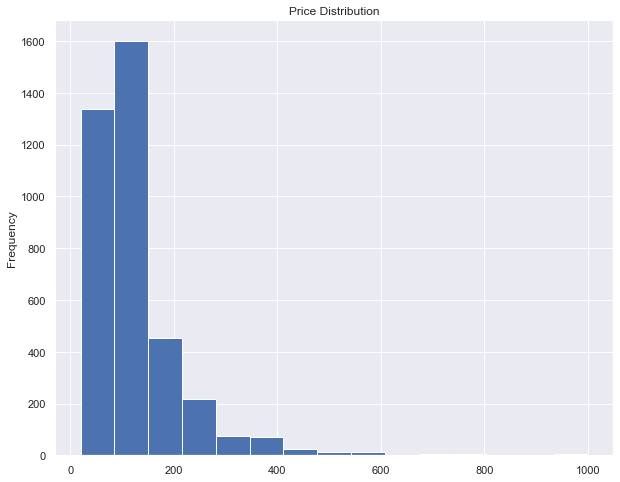

In [143]:
df1['price'].plot(kind='hist',bins=15,figsize=(10,8),title='Price Distribution')

### View Property Type Distribution

In [144]:
property_types = ((df1['property_type'].value_counts())/df1.shape[0])

In [145]:
property_types

House              0.453903
Apartment          0.447355
Townhouse          0.030906
Condominium        0.023834
Loft               0.010477
Bed & Breakfast    0.009691
Other              0.005762
Cabin              0.005500
Camper/RV          0.003405
Bungalow           0.003405
Boat               0.002095
Tent               0.001310
Treehouse          0.000786
Dorm               0.000524
Chalet             0.000524
Yurt               0.000262
Name: property_type, dtype: float64

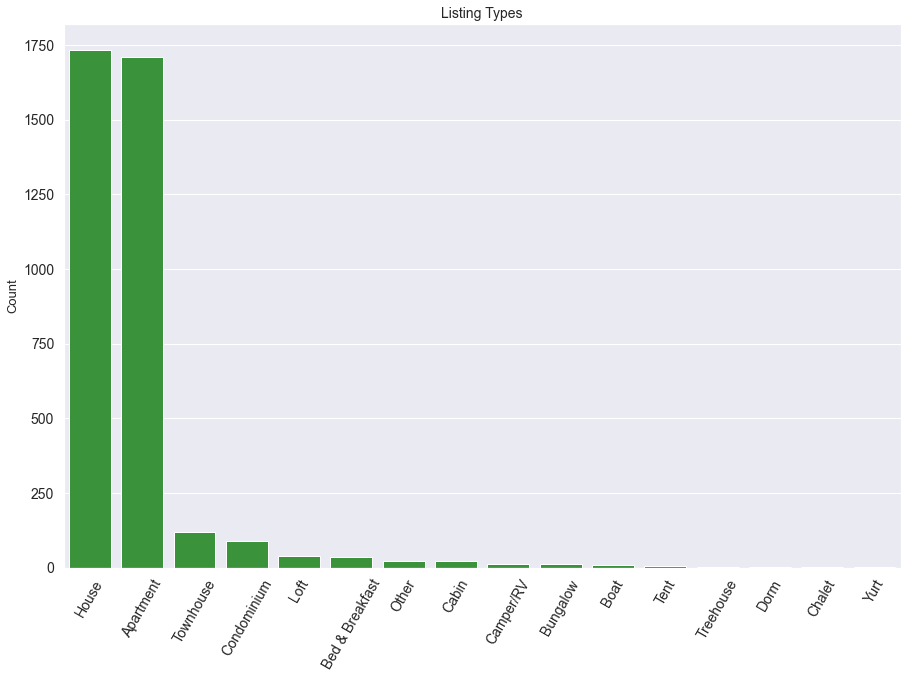

In [146]:
plt.figure(figsize = (15,10))
x = sns.countplot(x='property_type', data=df1, color='tab:green', order=df1.property_type.value_counts().index)
x.axes.set_title("Listing Types",fontsize=14)
plt.xticks(rotation=60)
x.set_ylabel("Count",fontsize=13)
x.set_xlabel("",fontsize=13)
x.tick_params(labelsize=14)
#plt.title("Property Type")
plt.show()

### View Room Type Distribution

In [147]:
dfroom = (df1['room_type'].value_counts())/df1.shape[0]

In [148]:
dfroom

Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64

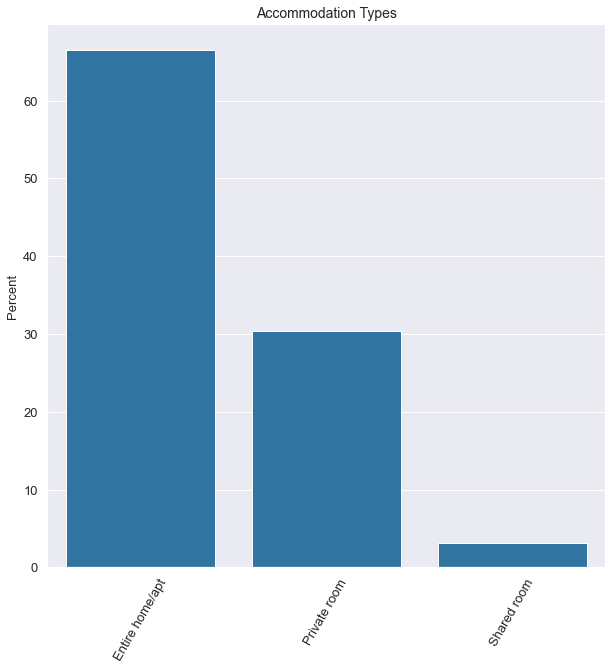

In [149]:
plt.figure(figsize = (10,10))
x = sns.barplot(x=dfroom.index,y=dfroom.values*100,color="tab:blue")
x.set_ylabel("Percent",fontsize=13)
x.tick_params(labelsize=13)
plt.xticks(rotation=60)
x.axes.set_title("Accommodation Types",fontsize=14)
plt.show()

### View Amenities Distribution

In [150]:
amenities_df['amenity']=amenities_df.index
amenities_df['Percentage'] = amenities_df['count']*100


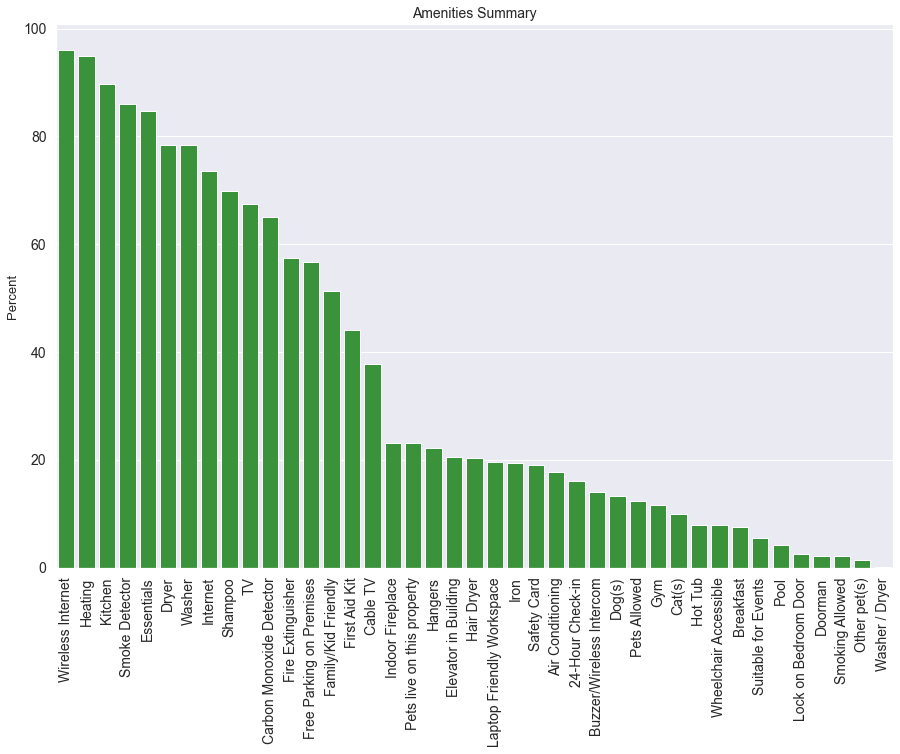

In [151]:
plt.figure(figsize = (15,10))
x = sns.barplot(x='amenity',y='Percentage',color='tab:green',data=amenities_df)
x.set_ylabel("Percent",fontsize=13)
x.set_xlabel("",fontsize=14)
x.tick_params(labelsize=14)
plt.xticks(rotation=60)
x.axes.set_title("Amenities Summary",fontsize=14)
plt.xticks(rotation=90)
plt.show()

### Create Dummy Variables for Amenities 

In [152]:
df_fit = df1.join(df1.pop('amenities').str.join('|').str.get_dummies())

In [153]:
df_fit.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,property_type,room_type,host_response_time,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,96.0,100.0,0.0,Apartment,Entire home/apt,within a few hours,4,1.0,1.0,1.0,Real Bed,2,moderate,95.0,10.0,10.0,10.0,10.0,9.0,4.07,10.0,0,85.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,98.0,100.0,1.0,Apartment,Entire home/apt,within an hour,4,1.0,1.0,1.0,Real Bed,1,strict,96.0,10.0,10.0,10.0,10.0,10.0,1.48,10.0,0,150.0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,67.0,100.0,0.0,House,Entire home/apt,within a few hours,11,4.5,5.0,7.0,Real Bed,10,strict,97.0,10.0,10.0,10.0,10.0,10.0,1.15,10.0,0,975.0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
3,NaN,NaN,0.0,Apartment,Entire home/apt,NaN,3,1.0,0.0,2.0,Real Bed,1,flexible,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,100.0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
4,100.0,NaN,0.0,House,Entire home/apt,within an hour,6,2.0,3.0,3.0,Real Bed,6,strict,92.0,9.0,9.0,10.0,10.0,9.0,0.89,9.0,0,450.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1


### View Correlation of Amenities With Guest Feedback Scores

In [154]:
nans = (df_fit.isnull().sum())

In [155]:
df_fit = df_fit.copy()

In [156]:
df_fit.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,bathrooms,bedrooms,beds,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,review_scores_value,instant_bookable,price,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
count,3295.000000,3045.000000,3816.000000,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3191.000000,3162.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,94.886798,99.967159,0.203878,3.349398,1.259469,1.307712,1.735394,1.672603,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,2.078919,9.452245,0.154793,127.976166,0.161341,0.177318,0.076218,0.140911,0.378732,0.650864,0.100052,0.133316,0.022263,0.784966,0.205605,0.847826,0.514144,0.575170,0.440021,0.567575,0.115767,0.202724,0.221582,0.949974,0.079361,0.232059,0.736249,0.194343,0.896543,0.195128,0.026192,0.013358,0.123625,0.231273,0.041645,0.190414,0.699319,0.859350,0.021477,0.054741,0.674175,0.783656,0.000524,0.078575,0.960450
std,11.866705,1.812201,0.402932,1.977599,0.590369,0.883395,1.139480,1.311040,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,1.822348,0.750259,0.361755,90.250022,0.367893,0.381988,0.265381,0.347976,0.485135,0.476759,0.300109,0.339960,0.147557,0.410900,0.404196,0.359236,0.499865,0.494382,0.496454,0.495478,0.319988,0.402081,0.415366,0.218028,0.270337,0.422202,0.440723,0.395746,0.304595,0.396351,0.159726,0.114816,0.329196,0.421702,0.199802,0.392679,0.458614,0.347705,0.144988,0.227503,0.468744,0.411805,0.022884,0.269110,0.194924
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,0.020000,2.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,100.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,0.695000,9.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,100.000000,100.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000,10.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.

In [157]:
# Define correlation dataframe
dfc = df_fit[['host_is_superhost','bathrooms','beds','review_scores_rating','bedrooms','reviews_per_month',
              'accommodates','instant_bookable','host_acceptance_rate','Suitable for Events',
              'price','host_response_rate','24-Hour Check-in','Air Conditioning','Breakfast','Pets Allowed',
              'Cable TV','Cat(s)','Dog(s)','Dryer','Fire Extinguisher','Essentials',
              'Pets live on this property','Pool','Shampoo','Safety Card','Smoke Detector','Smoking Allowed','Washer',
              'Family/Kid Friendly','Free Parking on Premises','Gym','Hair Dryer','Hangers','Heating','Hot Tub',
              'Indoor Fireplace','Internet','Iron','Kitchen','Laptop Friendly Workspace','Lock on Bedroom Door']]

In [158]:
# Rank order amenities by correlation with review score
rank_order = dfc.corr(method='pearson').review_scores_rating.sort_values(ascending=False)

In [163]:
rank_order

host_is_superhost             0.240895
host_response_rate            0.156567
Shampoo                       0.131519
Fire Extinguisher             0.117084
Safety Card                   0.105639
Pets live on this property    0.092559
reviews_per_month             0.087313
Free Parking on Premises      0.085832
Smoke Detector                0.083738
Essentials                    0.075050
Laptop Friendly Workspace     0.072402
Cat(s)                        0.066845
Air Conditioning              0.064883
Hangers                       0.059682
Indoor Fireplace              0.056018
price                         0.055551
Iron                          0.055377
Dog(s)                        0.054812
Hair Dryer                    0.054750
24-Hour Check-in              0.051055
bathrooms                     0.045101
Cable TV                      0.043423
Breakfast                     0.038645
Heating                       0.038145
bedrooms                      0.023257
Smoking Allowed          

In [160]:
rank_order.drop(labels='review_scores_rating',inplace=True)

In [161]:
sns.set(rc={'figure.figsize':(12,12)})

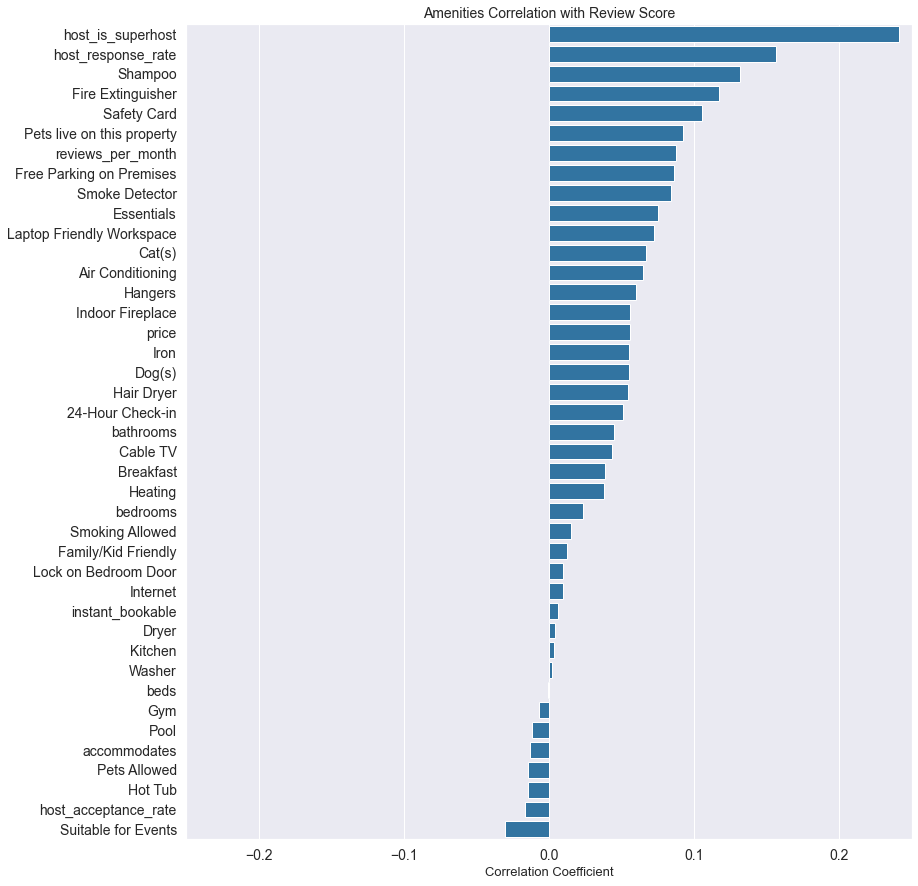

In [162]:
plt.figure(figsize=(13,15))
x = sns.barplot(y=rank_order.index,x=rank_order.values,orient="h",color='tab:blue')
x.set_ylabel("",fontsize=13)
x.set_xlabel("Correlation Coefficient",fontsize=13)
x.tick_params(labelsize=14)
x.axes.set_title("Amenities Correlation with Review Score",fontsize=14)
x.set(xlim=(-.25, .25))
plt.show()